<a href="https://colab.research.google.com/github/l3ft-debug/IMDb-Data-Mining-Movie-Analytics/blob/main/imdb_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb Data Mining & Movie Analytics (Upload CSV)

This notebook lets you upload your own IMDb dataset (CSV), clean and analyze it, and visualize key movie insights.

## Workflow:
- Upload dataset (`Top_1000_IMDB_Movies.csv` or similar)
- Clean and preprocess data
- Analyze genre trends, ratings, box office, etc.
- Visualize findings

For aspiring data analysts: Document your workflow, code, and insights for your portfolio.

In [1]:
# Step 1: Upload your dataset (CSV)
from google.colab import files
uploaded = files.upload()

Saving Top_1000_IMDB_Movies.csv to Top_1000_IMDB_Movies.csv


In [2]:
# Step 2: Load the data
import pandas as pd

# Replace with your uploaded filename if different
csv_file = list(uploaded.keys())[0]
df_raw = pd.read_csv(csv_file)
df_raw.head()

,Unnamed: 0,Name of movie,Year of relase,Watchtime,Genre,PG_Rating,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star
0,0,The Shawshank Redemption,1994,142,Drama,R,9.3,81,"2,660,946",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'..."
1,1,The Godfather,1972,175,"Crime, Drama",---,9.2,100,"1,844,072",$134.97M,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '..."
2,2,Kantara,2022,148,"Action, Adventure, Drama",---,9.1,-----,"66,010",*****,It involves culture of Kambla and Bhootha Kola...,Rishab Shetty,"['Rishab Shetty', 'Sapthami Gowda', 'Kishore K..."
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",PG-13,9.0,84,"2,633,886",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
4,4,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",PG-13,9.0,94,"1,834,811",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell..."


## Step 3: Data Cleaning & Preprocessing
Standardize genres, convert ratings & box office to numeric, handle missing values.

In [3]:
import re

def clean_box_office(value):
    if pd.isnull(value):
        return None
    value = str(value).replace('$', '').replace(',', '').strip()
    m = re.match(r'([\d\.]+)M', value)
    if m:
        return float(m.group(1))
    m = re.match(r'([\d\.]+)K', value)
    if m:
        return float(m.group(1))/1000
    try:
        return float(value)
    except:
        return None

def clean_genre(value):
    if pd.isnull(value):
        return None
    return ', '.join(sorted(set([g.strip() for g in value.split(',')])))

def clean_year(value):
    try:
        year = int(value)
        if 1900 < year < 2100:
            return year
        else:
            return None
    except:
        return None

def clean_rating(value):
    try:
        return float(value)
    except:
        return None

# Clean columns (adapt column names to your dataset)
df = df_raw.copy()
if 'Gross collection' in df.columns:
    df['BoxOffice_Millions'] = df['Gross collection'].apply(clean_box_office)
if 'Genre' in df.columns:
    df['Genre'] = df['Genre'].apply(clean_genre)
if 'Year of relase' in df.columns:
    df['Year'] = df['Year of relase'].apply(clean_year)
if 'Movie Rating' in df.columns:
    df['Rating'] = df['Movie Rating'].apply(clean_rating)

# Fill missing director/star
if 'Director' in df.columns:
    df['Director'] = df['Director'].fillna('Unknown')
if 'Star' in df.columns:
    df['Stars'] = df['Star'].fillna('Unknown')

# Drop rows missing title/year
df = df[df.get('Year', pd.Series([None]*len(df))).notnull()]
df = df[df.get('Name of movie', pd.Series([None]*len(df))).notnull()]

df.head()

,Unnamed: 0,Name of movie,Year of relase,Watchtime,Genre,PG_Rating,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star,BoxOffice_Millions,Year,Rating,Stars
0,0,The Shawshank Redemption,1994,142,Drama,R,9.3,81,"2,660,946",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",28.34,1994.0,9.3,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'..."
1,1,The Godfather,1972,175,"Crime, Drama",---,9.2,100,"1,844,072",$134.97M,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",134.97,1972.0,9.2,"['Marlon Brando', 'Al Pacino', 'James Caan', '..."
2,2,Kantara,2022,148,"Action, Adventure, Drama",---,9.1,-----,"66,010",*****,It involves culture of Kambla and Bhootha Kola...,Rishab Shetty,"['Rishab Shetty', 'Sapthami Gowda', 'Kishore K...",NaN,2022.0,9.1,"['Rishab Shetty', 'Sapthami Gowda', 'Kishore K..."
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",PG-13,9.0,84,"2,633,886",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",534.86,2008.0,9.0,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
4,4,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",PG-13,9.0,94,"1,834,811",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",377.85,2003.0,9.0,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell..."


## Step 4: Analysis & Visualization

/tmp/ipython-input-1750705429.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts), palette='viridis')


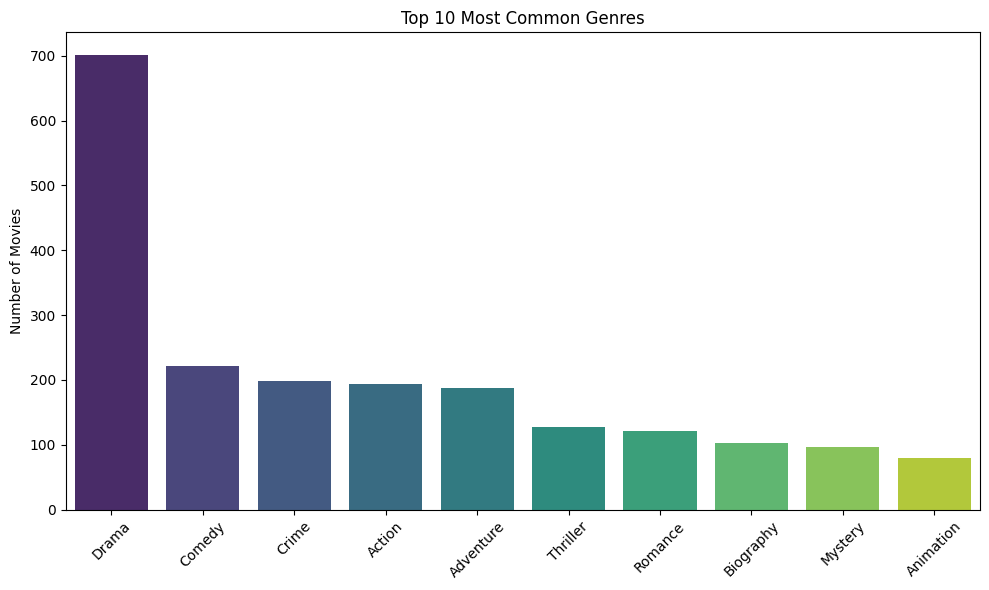

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Genre Popularity
genre_counts = Counter(g for genres in df['Genre'].dropna() for g in genres.split(', '))
top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)
plt.figure(figsize=(10,6))
sns.barplot(x=list(genres), y=list(counts), palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2895030890.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Rating', marker='o', ci=None)


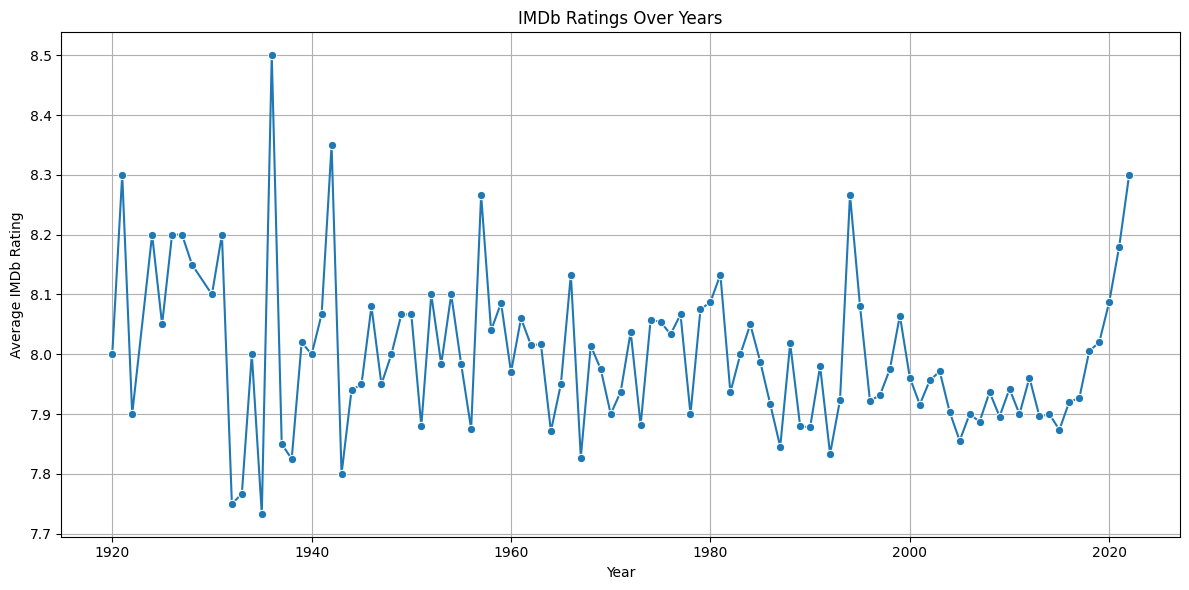

In [5]:
# Ratings Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Rating', marker='o', ci=None)
plt.title('IMDb Ratings Over Years')
plt.ylabel('Average IMDb Rating')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3335973415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_boxoffice['Name of movie'], x=top_boxoffice['BoxOffice_Millions'], palette='mako')


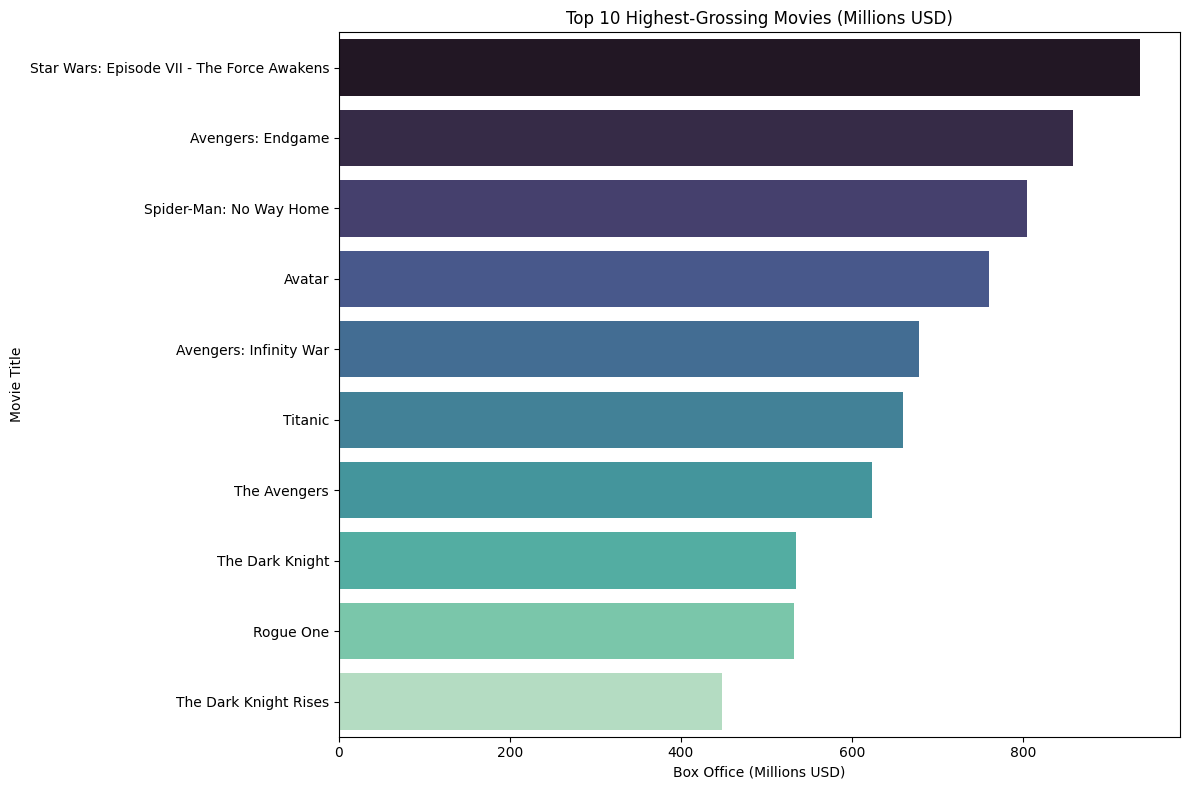

In [6]:
# Highest-Grossing Movies
top_boxoffice = df.sort_values('BoxOffice_Millions', ascending=False).head(10)
plt.figure(figsize=(12,8))
sns.barplot(y=top_boxoffice['Name of movie'], x=top_boxoffice['BoxOffice_Millions'], palette='mako')
plt.title('Top 10 Highest-Grossing Movies (Millions USD)')
plt.xlabel('Box Office (Millions USD)')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

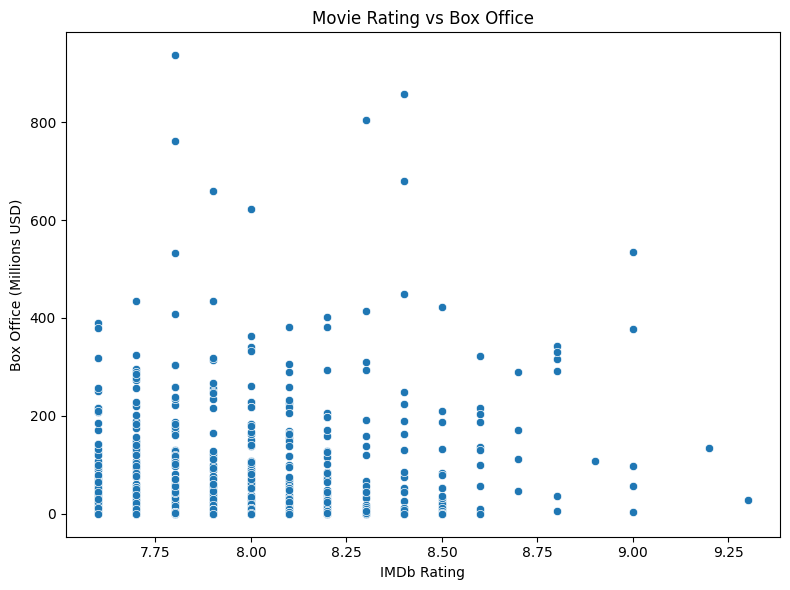

In [7]:
# Correlation: Rating vs Box Office
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating', y='BoxOffice_Millions', data=df)
plt.title('Movie Rating vs Box Office')
plt.xlabel('IMDb Rating')
plt.ylabel('Box Office (Millions USD)')
plt.tight_layout()
plt.show()